<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXAMPLE2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: The Continuous Stirred-Tank Reactor (CSTR)

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

Consider a simple liquid-phase, irreversible chemical reaction where chemical species A reacts to form species B. The reaction can be written as A → B. We assume that the rate of reaction is frst-order with respect to component A,

$$
r = kC_A \tag{1}
$$

where r is the rate of reaction of A per unit volume, k is the reaction rate constant (with units of reciprocal time), and cA is the molar concentration of species A. For single-phase reactions, the rate constant is typically a strong function of reaction temperature given by the Arrhenius relation,

$$k = k_0 e^{-E/RT}$$

where $k_0$ is the frequency factor, E is the activation energy, and R is the gas constant.

The inlet stream consists of pure component A with molar concentration, cAi. A cooling coil is used to maintain the reaction mixture at the desired operating temperature by removing heat that is released in the exothermic reaction

### 2. Assumptions 

1. The CSTR is perfectly mixed

2. The mass densities of the feed and product streams are equal and constant. they are dnoted by $\rho$

3. The liquid volume V in the reactor is kept constant by an overflow line

4. The thermal capacitances of the coolant and the cooling coil wall are negligible compared to the thermal capacitance of the liquid in the tank 

5. All of the coolant is at a uniform temperature, $T_c$. (That is, the increase in coolant temperature as the coolant passes through the coil is neglected)

6. The rate of heat transfer from the reactor contents to the coolant is given by 

$$
Q = UA(T_c - T) \tag{2}
$$

where U is the overall heat transfer coefficient and A is the heat transfer area. Both of these model parameters are assumed to be constant 

7. The enthalpy change associated with the mixing of the feed and the liquid in the tank is negligible compared with the enthalpy change for the chemical reaction. In other words, the heat of mixing is negligible compared to the heat of reaction

8. Shaft work and heat losses to the ambient can be neglected


### 3. Scheme of the process 
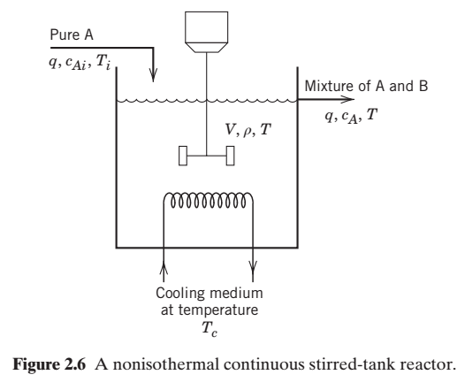

### Process network

### 4. Data 

Table 1. Nominal Operating Conditions for the CSTR

| Parameter | Value | Parameter | Value |
|:---:|:---:|:---:|:---:|
| $q$ | 100 L/min| $E/R$ | 8750 K |
| $C_{Ai}$ | 1 mol/L | $k_0$ | 7.2 x $10^{10}\ min^{-1}$ |
| $T_i$ | 350 K | $UA$ | 5 x $10^4$ J/min K |
| $V$ | 100 L | $T_c(0)$ | 300 K|
| $\rho$ | 1000 g/L | $c_A(0)$ | 0.5 mol*L|
| $C$ | 0.239 J/g K | T(0) | 350K |
| $-\Delta H_R$ | 5 x $10^4$ J/mol | | |


### 5. Analysis 

#### 5.1 Establish the model 

Total mass balance

$$\frac{d(\rho V)}{dt} = \rho q_i - \rho q$$

Since $\rho$ is constant and $q_i = q$ we have 

$$\frac{dV}{dt} = 0$$

Mass balance for A

$$
\frac{d(c_A V)}{dt} = q c_{Ai} - q c_A - r V 
$$

simplifying 

$$
\frac{dc_A}{dt} = \frac{q}{V}(c_{Ai} - c_A) - r \tag{3}
$$

Energy balance 

$$
\frac{dU_{tot}}{dt} = \rho q_i \hat{H}_i - \rho q \hat{H} + r V (-\Delta H_{rec}) + UA(T_c - T)
$$

Simplifying we get

$$
V\rho C \frac{dT}{dt} = \rho C q (T_i - T ) + r V (-\Delta H_{rec}) + UA(T_c - T)
$$

$$
\frac{dT}{dt} = \frac{q}{V} (T_i - T ) + \frac{1}{\rho C} r (-\Delta H_{rec}) + \frac{UA}{V\rho C}(T_c - T) \tag{4}
$$

where 

$$r = k_0 e^{-E/RT} C_A$$

#### 5.2 Steady state 


In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
# establish symbols
q, cai, ca, V, Ti, T, rho, C, Hrec, U, A, Tc, k0, E, R = sp.symbols("q, cai, ca, V, Ti, T, rho, C, Hrec, U, A, Tc, k0, E, R")

In [10]:
# establish equations 
eq1 = sp.Eq(q/V*(cai - ca ) - k0*sp.exp(-E/(R*T))*ca,0)
eq2 = sp.Eq(q/V*(Ti-T) + (1/(rho*C))*k0*sp.exp(-E/(R*T))*ca*(-Hrec) + U*A/(V*rho*C)*(Tc - T),0)

In [ ]:
# solve equations 
sp.solve([eq1, eq2], [T, ca])

It is not possible to solve this system. T is inside the exponential, it is so difficult to solve that :(

#### 5.4 Numerical simulation 

In [52]:
def csrt(s, time, Tc):

    # state variables 
    ca = s[0]
    T = s[1]

    # paramters 
    q = 100.0 # L/min
    cai = 1.0 # mol/L
    V = 100.0 # L
    Ti = 350.0 # K
    rho = 1000.0 # g/L
    C = 0.239 # J/g K
    Hrec = -5e4 # J/g K
    UA = 5e4 # J/ min K
    #Tc = 300.0 # K
    k0 = 7.2e10 # min-1
    ER = 8750.0 # K

    # kinict reaction 
    r = k0*np.exp(-ER/T)*ca

    # mass balance for a
    dcadt = q/V*(cai - ca) - r

    # energy balance
    dTdt = q/V*(Ti-T) + (1/(rho*C))*r*(-Hrec) + UA/(V*rho*C)*(Tc - T)

    return [dcadt, dTdt]

In [53]:
# initial conditions 
s = [0.5, 350] # mol/L, K

# integration time
time = np.linspace(0,10,1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

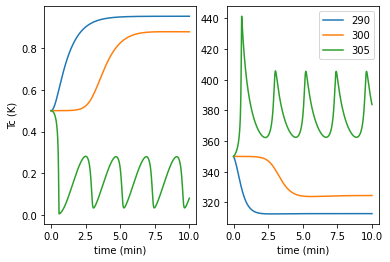

In [66]:
for i in [290,300,305]:
    # solve the ODEs
    out = odeint(csrt,s,time, args=(i,))
    ca = out[:,0]
    plt.subplot(1,2,1)
    plt.plot(time, ca)
    plt.ylabel("Tc (K)")
    plt.xlabel("time (min)")
    T = out[:,1]
    plt.subplot(1,2,2)
    plt.plot(time, T)
    plt.xlabel("time (min)")
plt.legend([290,300,305])